## Adaline 网络

### Adaline下的两分类

序列 X1 X2 类别
1 -0.1 -0.2 -1
2 0.5 0.5 1
3 -0.5 0.2 -1
4 -0.2 0.5 -1
5 0.2 0.1 1
6 0.0 0.8 1


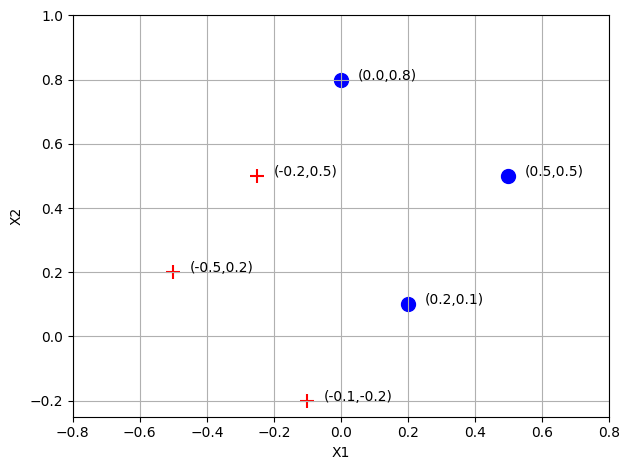

In [2]:
# data import and visualization
import sys,os,math,time
import matplotlib.pyplot as plt
from numpy import *
xdim = [(-0.1,-0.2), (0.5,0.5), (-0.5,0.2),(-0.25,0.5),(0.2,0.1),(0,0.8)]
ldim = [-1,1,-1,-1,1,1]
print("序列", "X1", "X2", "类别")
count = 0
for x,l in zip(xdim, ldim):
    count += 1
    print("%d %3.1f %3.1f %d"%(count, x[0], x[1], l))
    if l > 0:
        marker = 'o'
        color = 'blue'
    else:
        marker = '+'
        color = 'red'
    plt.scatter(x[0], x[1], marker=marker, c=color, s=100)
    plt.text(x[0]+0.05,x[1],'(%3.1f,%3.1f)'%(x[0],x[1]))
plt.axis([-0.8, 0.8,-0.25, 1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Adaline分类实现

Weights: [1.26437248 0.52770145]
Bias: [-0.10721881]


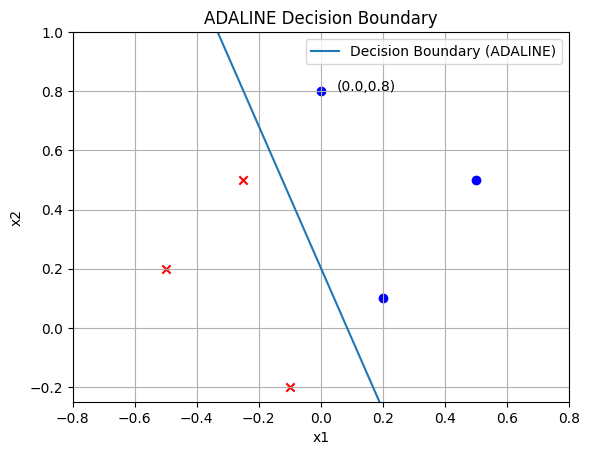

In [8]:
import numpy as np
import matplotlib.pyplot as plt

weights = np.random.rand(2)
bias = np.random.rand(1)
learning_rate = 0.01
epochs = 100

def adaline_train(xdim, ldim, weights, bias, learning_rate, epochs):
    for epoch in range(epochs):
        for i in range(len(xdim)):
            x = xdim[i]
            target = ldim[i]
            output = np.dot(x, weights) + bias
            error = target - output  # Calculate error
            # Update weights and bias
            weights += learning_rate * error * x
            bias += learning_rate * error
    return weights, bias

weights, bias = adaline_train(xdim, ldim, weights, bias, learning_rate, epochs)

# Print trained weights and bias
print(f"Weights: {weights}")
print(f"Bias: {bias}")

# Plot linear decision boundary
def plot_decision_boundary(weights, bias):
    x_vals = np.linspace(-1, 1, 100)
    y_vals = -(weights[0] * x_vals + bias) / weights[1]  # Linear decision function
    plt.plot(x_vals, y_vals, label="Decision Boundary (ADALINE)")
    
# Plot sample points
def plot_samples():
    for i, sample in enumerate(xdim):
        if ldim[i] == 1:
            plt.scatter(sample[0], sample[1], color='blue', marker='o')
        else:
            plt.scatter(sample[0], sample[1], color='red', marker='x')
        
# Plot results
plt.figure()
plot_samples()
plot_decision_boundary(weights, bias)
plt.title("ADALINE Decision Boundary")
plt.axis([-0.8, 0.8, -0.25, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()


#### 与感知机分类的对比

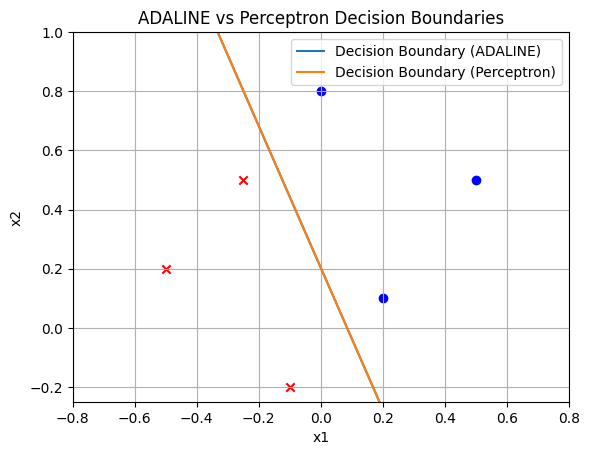

In [9]:
def perceptron_train(xdim, ldim, weights, bias, learning_rate, epochs):
    for epoch in range(epochs):
        for i in range(len(xdim)):
            x = xdim[i]
            target = ldim[i]
            output = np.dot(x, weights) + bias
            predicted = 1 if output >= 0 else -1
            if predicted != target:
                error = target - predicted
                weights += learning_rate * error * x
                bias += learning_rate * error
    return weights, bias

# Train the perceptron
weights_perceptron, bias_perceptron = perceptron_train(xdim, ldim, weights, bias, learning_rate, epochs)

# Plot perceptron decision boundary
def plot_decision_boundary_perceptron(weights, bias):
    x_vals = np.linspace(-1, 1, 100)
    y_vals = -(weights[0] * x_vals + bias) / weights[1]  # Linear decision function
    plt.plot(x_vals, y_vals, label="Decision Boundary (Perceptron)")

plt.figure()
plot_samples()
plot_decision_boundary(weights, bias)
plot_decision_boundary_perceptron(weights_perceptron, bias_perceptron)
plt.title("ADALINE vs Perceptron Decision Boundaries")
plt.axis([-0.8, 0.8, -0.25, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()


##### 感知机算法：

* 感知机仅根据误分类样本来更新权重，不关心误差的大小。它的输出是符号判断（1或-1），所以会存在在边界附近的样本容易被误分类。
* 感知机的收敛性依赖于数据是否线性可分，如果数据不可分，它可能无法收敛。

##### ADALINE算法：

* ADALINE使用LMS算法，最小化预测值与真实值的平方误差。因此，即使样本分类正确，它也会调整权重来减少误差。
* ADALINE的优点是误差较小的样本会对更新权重产生较小的影响，因此其训练过程更加平滑，适合处理线性不可分问题时的逼近问题。

在线性可分问题上，感知机和ADALINE的性能可能类似，但对于一些噪声数据或边界上的点，ADALINE的表现可能更稳定

### 鸟类分类

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sign function used for classification
def sgn(output):
    return np.where(output >= 0, 1, -1)

# Core ADALINE code with sign function for classification
def adaline_train(X, y, learning_rate, epochs):
    n_samples, n_features = X.shape
    weights = np.random.rand(n_features)
    bias = np.random.rand(1)
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(n_samples):
            # Linear output
            linear_output = np.dot(X[i], weights) + bias
            # Calculate error
            error = y[i] - linear_output
            # LMS update weights and bias
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
            # Accumulate error
            total_error += error ** 2
        
        errors.append(total_error / n_samples)  # Record average error for each epoch

    return weights, bias, errors

# ADALINE classification prediction function
def adaline_predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return sgn(linear_output)  # Use sign function for classification


In [18]:
def species_generator(mu1, sigma1, mu2, sigma2, n_samples, target, seed):
    rand = np.random.RandomState(seed)
    f1 = rand.normal(mu1, sigma1, n_samples)
    f2 = rand.normal(mu2, sigma2, n_samples)
    X = np.array([f1, f2]).T
    y = np.full(n_samples, target)
    return X, y

def plot_decision_boundary(X, y, weights, bias):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Great horned owl')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Wandering albatross')
    
    # Calculate linear decision boundary (y = w1*x1 + w2*x2 + bias = 0)
    x1_values = np.linspace(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5, 100)
    x2_values = -(weights[0] * x1_values + bias) / weights[1]  # Solve for x2 from the equation

    plt.plot(x1_values, x2_values, color='green', label='Decision Boundary')

    plt.title('ADALINE Classification with Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


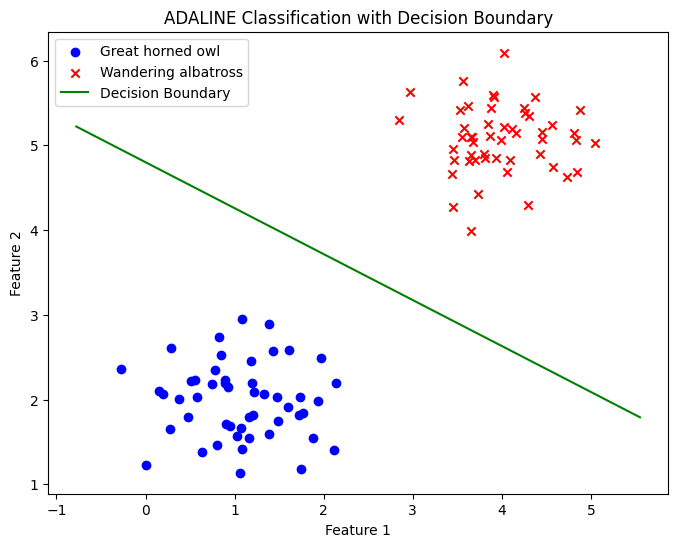

In [19]:
X1, y1 = species_generator(1, 0.5, 2, 0.5, 50, 1, seed=0)  # 第一类鸟
X2, y2 = species_generator(4, 0.5, 5, 0.5, 50, -1, seed=1) # 第二类鸟

X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

learning_rate = 0.01
epochs = 100
weights, bias, errors = adaline_train(X, y, learning_rate, epochs)

plot_decision_boundary(X, y, weights, bias)

#### 不同学习率对训练结果的影响

* 较小的学习速率（例如0.001）：模型更新较为缓慢，误差减少较慢，训练时间较长，但较为稳定。
* 中等的学习速率（例如0.01）：模型更新适中，误差迅速下降，较快收敛。
* 较大的学习速率（例如1.0或5.0）：模型更新幅度过大，可能导致误差不稳定甚至发散，模型无法收敛。

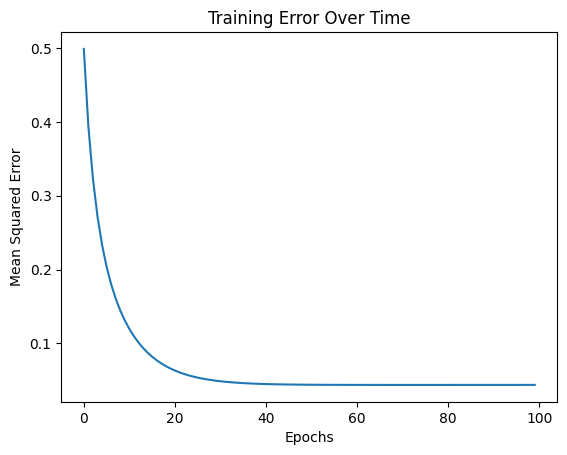

In [16]:
# 
plt.plot(errors)
plt.title('Training Error Over Time')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()